<a href="https://colab.research.google.com/github/kwakyosong/BIO_Python/blob/main/%EC%9D%BC%ED%91%9C%EB%B3%B8_T_%EA%B2%80%EC%A0%95_%EC%96%91%EC%B8%A1%EA%B2%80%EC%A0%95_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One-Sided T-test: T-statistic: 1.67, P-value: 0.0524
Two-Sided T-test: T-statistic: 1.67, P-value: 0.1049


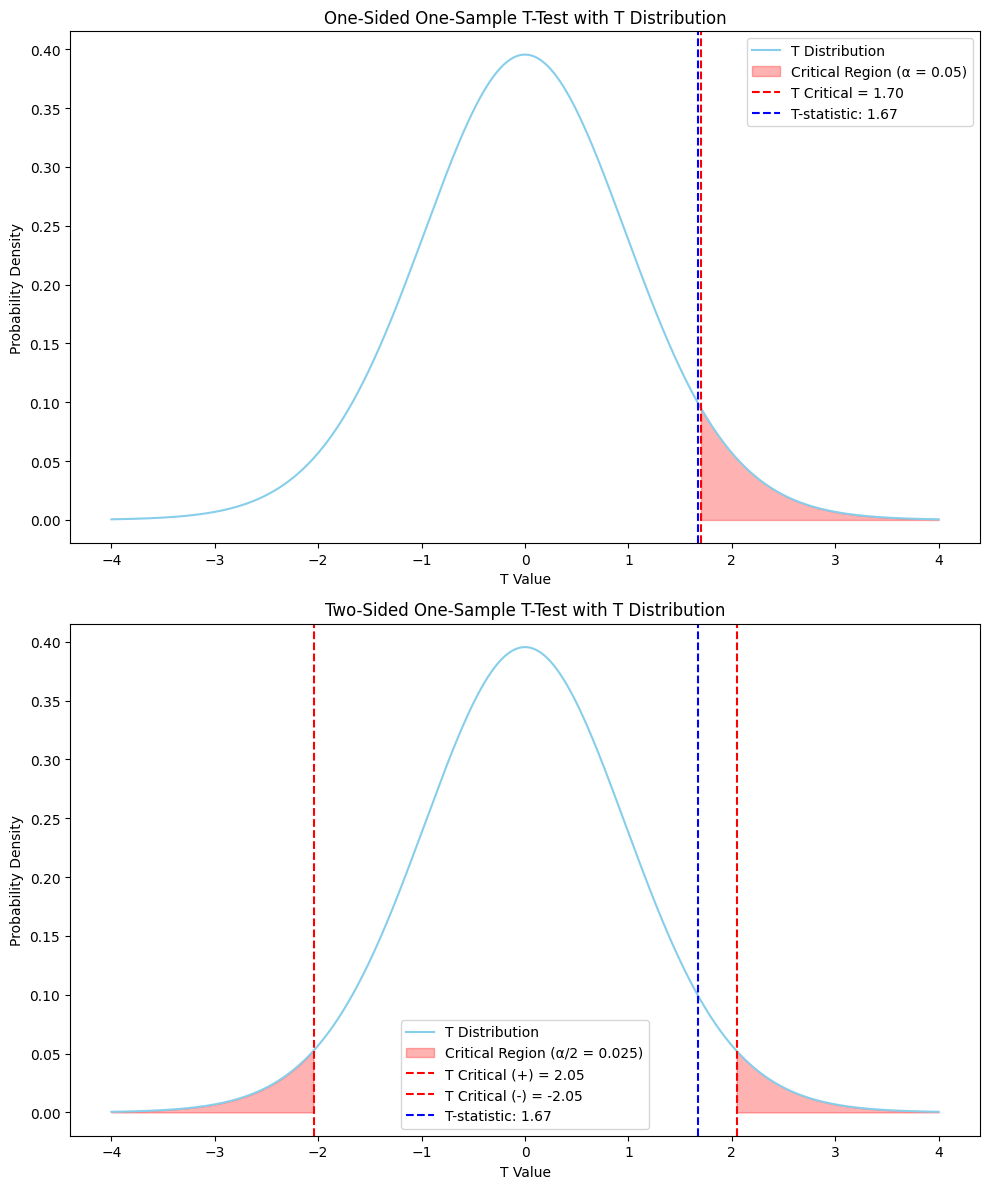

In [1]:
import numpy as np  # 배열 및 수학적 계산을 위한 NumPy 라이브러리
import matplotlib.pyplot as plt  # 그래프 생성을 위한 Matplotlib 라이브러리
from scipy.stats import ttest_1samp, t  # T 검정 함수와 T 분포를 위한 SciPy 모듈

# 데이터 배열
sample_data = np.array([  # 샘플 데이터 배열 생성
    88, 78, 64, 92, 57, 70, 88, 68, 72, 60,
    60, 73, 85, 89, 73, 52, 71, 51, 73, 93,
    79, 87, 51, 70, 82, 61, 71, 93, 74, 98
])

# 모집단 평균 설정
population_mean = 70  # 가설 검정에서 사용할 모집단 평균 값 설정

# 단측 일표본 T 검정 수행
t_stat_one_sided, p_value_one_sided = ttest_1samp(sample_data, population_mean)
# ttest_1samp(sample_data, population_mean):
# - sample_data: 검정할 샘플 데이터 배열
# - population_mean: 비교할 모집단 평균
# - 반환값: T 통계량(t_stat_one_sided), p-값(p_value_one_sided)

degrees_of_freedom = len(sample_data) - 1  # 자유도 계산

# 유의수준 및 단측 기각 기준 설정
alpha = 0.05  # 유의수준 설정
t_critical_one_sided = t.ppf(1 - alpha, degrees_of_freedom)
# t.ppf(1 - alpha, degrees_of_freedom):
# - 1 - alpha: 단측 검정에서의 신뢰구간
# - degrees_of_freedom: T 분포의 자유도
# - 반환값: 단측 기각 기준에 해당하는 T 분포의 임계값

# 결과 출력
print(f"One-Sided T-test: T-statistic: {t_stat_one_sided:.2f}, P-value: {p_value_one_sided / 2:.4f}")

# 양측 일표본 T 검정 수행
t_stat_two_sided, p_value_two_sided = ttest_1samp(sample_data, population_mean)

# 유의수준 및 양측 기각 기준 설정
t_critical_two_sided = t.ppf(1 - alpha / 2, degrees_of_freedom)
# t.ppf(1 - alpha / 2, degrees_of_freedom):
# - 1 - alpha / 2: 양측 검정의 신뢰구간
# - degrees_of_freedom: T 분포의 자유도
# - 반환값: 양측 기각 기준에 해당하는 T 분포의 임계값

# 결과 출력
print(f"Two-Sided T-test: T-statistic: {t_stat_two_sided:.2f}, P-value: {p_value_two_sided:.4f}")

# 그래프 설정
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2개의 서브플롯 생성, 크기 설정

# 단측 검정 T 분포 그래프
x = np.linspace(-4, 4, 1000)  # -4부터 4까지 1000개의 점 생성
y = t.pdf(x, degrees_of_freedom)  # T 분포의 확률 밀도 함수 계산

# T 분포 곡선
axs[0].plot(x, y, color="skyblue", label="T Distribution")  # 단측 검정 T 분포 곡선 그리기

# 단측 기각 기준 표시
axs[0].fill_between(x, y, where=(x > t_critical_one_sided), color="red", alpha=0.3, label=f"Critical Region (α = {alpha})")
# 기각 영역 색칠

axs[0].axvline(t_critical_one_sided, color="red", linestyle="--", label=f"T Critical = {t_critical_one_sided:.2f}")  # 단측 기각 기준 수직선
axs[0].axvline(t_stat_one_sided, color="blue", linestyle="--", label=f"T-statistic: {t_stat_one_sided:.2f}")  # T 통계량 수직선

# 그래프 제목 및 라벨 설정
axs[0].set_title("One-Sided One-Sample T-Test with T Distribution")  # 그래프 제목
axs[0].set_xlabel("T Value")  # X축 라벨
axs[0].set_ylabel("Probability Density")  # Y축 라벨
axs[0].legend()  # 범례 표시

# 양측 검정 T 분포 그래프
axs[1].plot(x, y, color="skyblue", label="T Distribution")  # 양측 검정 T 분포 곡선 그리기

# 양측 기각 기준 표시
axs[1].fill_between(x, y, where=(x > t_critical_two_sided), color="red", alpha=0.3, label=f"Critical Region (α/2 = {alpha/2})")  # 오른쪽 기각 영역 색칠
axs[1].fill_between(x, y, where=(x < -t_critical_two_sided), color="red", alpha=0.3)  # 왼쪽 기각 영역 색칠

# 양측 임계값 표시
axs[1].axvline(t_critical_two_sided, color="red", linestyle="--", label=f"T Critical (+) = {t_critical_two_sided:.2f}")  # 오른쪽 기각 기준 수직선
axs[1].axvline(-t_critical_two_sided, color="red", linestyle="--", label=f"T Critical (-) = {-t_critical_two_sided:.2f}")  # 왼쪽 기각 기준 수직선
axs[1].axvline(t_stat_two_sided, color="blue", linestyle="--", label=f"T-statistic: {t_stat_two_sided:.2f}")  # T 통계량 수직선

# 그래프 제목 및 라벨 설정
axs[1].set_title("Two-Sided One-Sample T-Test with T Distribution")  # 그래프 제목
axs[1].set_xlabel("T Value")  # X축 라벨
axs[1].set_ylabel("Probability Density")  # Y축 라벨
axs[1].legend()  # 범례 표시

plt.tight_layout()  # 서브플롯 간의 간격 조정
plt.show()  # 그래프 화면에 표시
